<a href="https://colab.research.google.com/github/abhi1ranjan/ML-Algorithm_Practise/blob/main/Bagging_and_Bootstraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [8]:
def bootstrap(X, y, n_samples=2000):
    models = []
    precision = []
    recall = []
    f1 = []
    indices_x = []
    indices_y = []

    for i in range(n_samples):
        index_x = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
        indices_x.append(index_x)
        X_sample = X[index_x, :]

        index_y = np.random.choice(y.shape[0], size=y.shape[0], replace=True)
        indices_y.append(index_y)
        y_sample = y[index_y]

        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=42
        )

        model = DecisionTreeClassifier().fit(X_train, y_train)
        models.append(model)

        y_pred = model.predict(X_test)
        precision.append(
            metrics.precision_score(y_test, y_pred, average="macro")
        )
        recall.append(metrics.recall_score(y_test, y_pred, average="macro"))
        f1.append(metrics.f1_score(y_test, y_pred, average="macro"))

    # Save the results to a Pandas dataframe
    pred_df = pd.DataFrame(
        {
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "Models": models,
            "Indices_X": indices_x,
            "Indices_Y": indices_y,
        }
    )

    return models, pred_df

In [9]:
# call the function.

models, pred_df = bootstrap(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Show the results of the data frame
pred_df.head()

,Precision,Recall,F1,Models,Indices_X,Indices_Y
0,0.480556,0.449084,0.446775,DecisionTreeClassifier(),"[19, 106, 76, 107, 56, 111, 23, 75, 116, 40, 2...","[75, 60, 25, 80, 6, 118, 19, 17, 29, 123, 142,..."
1,0.150327,0.254545,0.176548,DecisionTreeClassifier(),"[25, 114, 46, 42, 3, 71, 20, 84, 100, 108, 32,...","[89, 101, 49, 70, 86, 143, 110, 16, 76, 93, 49..."
2,0.476551,0.502646,0.472105,DecisionTreeClassifier(),"[61, 58, 8, 15, 110, 81, 138, 79, 7, 127, 130,...","[18, 14, 125, 78, 91, 66, 94, 123, 107, 29, 14..."
3,0.187879,0.200000,0.185897,DecisionTreeClassifier(),"[55, 95, 126, 72, 71, 45, 40, 116, 52, 129, 40...","[49, 43, 88, 112, 143, 63, 30, 51, 41, 50, 140..."
4,0.358333,0.315751,0.325810,DecisionTreeClassifier(),"[148, 66, 129, 68, 132, 58, 77, 102, 78, 47, 1...","[121, 17, 108, 25, 148, 48, 57, 34, 125, 147, ..."


In [11]:
# add the index column as the model number
pred_df['Model Number'] = pred_df.index

In [12]:
# sort the values by precision.

pred_df.sort_values(by= "Precision", ascending = False).head(5)

,Precision,Recall,F1,Models,Indices_X,Indices_Y,Model Number
1848,0.694805,0.652778,0.652076,DecisionTreeClassifier(),"[31, 0, 44, 62, 57, 61, 77, 5, 107, 131, 95, 8...","[60, 26, 59, 85, 140, 91, 79, 66, 126, 7, 84, ...",1848
1519,0.666667,0.492063,0.501720,DecisionTreeClassifier(),"[16, 134, 132, 12, 123, 71, 17, 105, 60, 136, ...","[26, 47, 82, 59, 31, 145, 106, 60, 25, 46, 9, ...",1519
1032,0.655556,0.607744,0.602778,DecisionTreeClassifier(),"[7, 105, 14, 75, 107, 104, 26, 1, 19, 2, 21, 6...","[34, 104, 100, 115, 21, 36, 33, 22, 71, 79, 92...",1032
254,0.643519,0.569444,0.574074,DecisionTreeClassifier(),"[86, 5, 44, 126, 141, 120, 124, 3, 82, 16, 127...","[75, 106, 34, 39, 120, 149, 100, 44, 16, 83, 1...",254
1587,0.638889,0.677249,0.631865,DecisionTreeClassifier(),"[122, 67, 117, 147, 31, 18, 88, 135, 54, 149, ...","[24, 123, 30, 71, 84, 115, 125, 50, 12, 41, 6,...",1587


### Bootstrapping Visualization

The code below creates 3 bar graphs to show the performance of bootstrapped models.

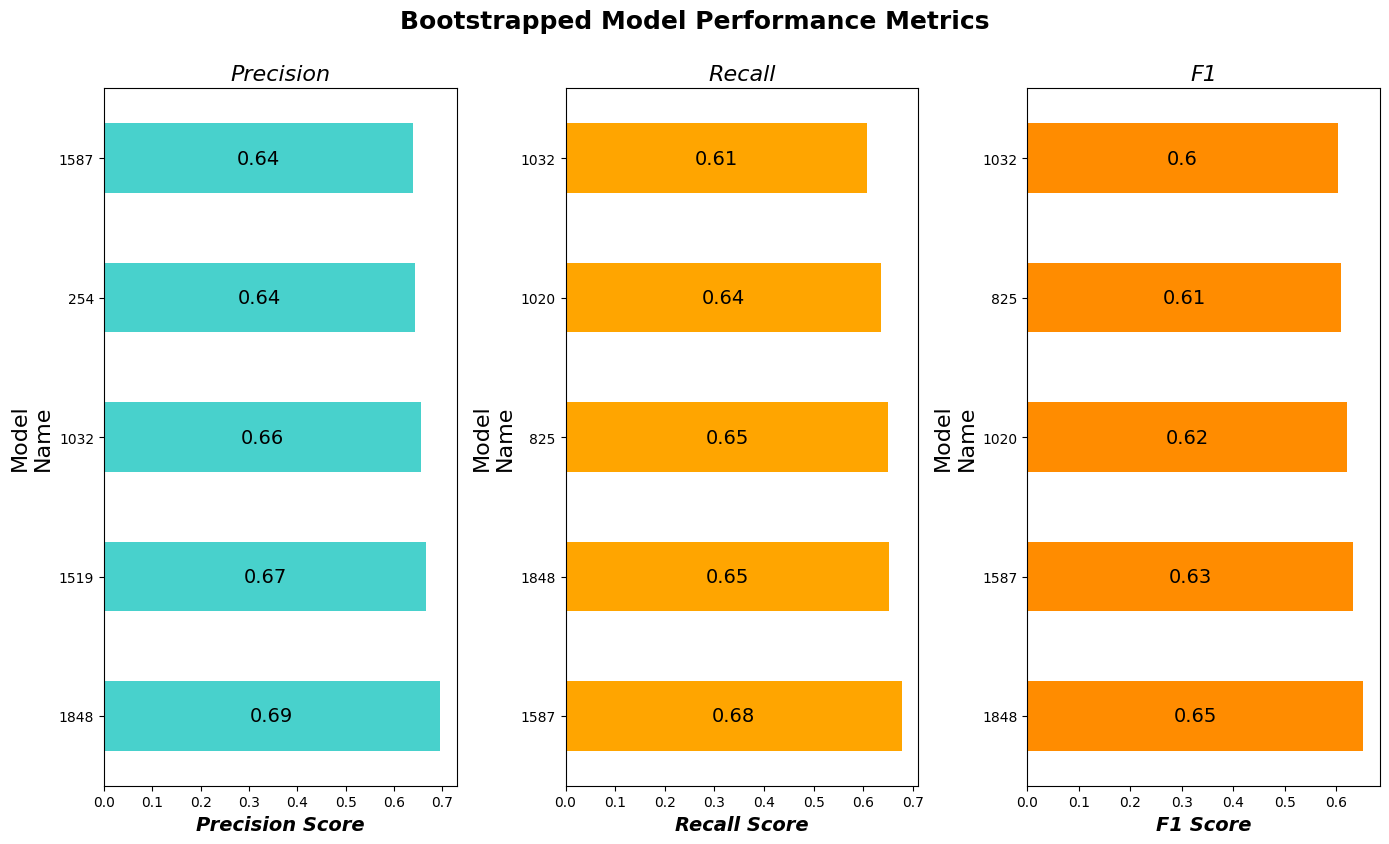

In [14]:
# Create a figure and subplots
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(14, 8))

best_of = pred_df.sort_values(by="Precision", ascending=False).head(5)

# Create the first graph
best_of.plot(
    kind="barh",
    x="Model Number",
    y="Precision",
    color="mediumturquoise",
    ax=ax2,
    legend=False,
)
ax2.set_xlabel(
    "Precision Score",
    fontstyle="italic",
    fontsize=14,
    font="Courier New",
    fontweight="bold",
    y=1.1,
)
ylabel = "Model\nName"
ax2.set_ylabel(ylabel, fontsize=16, font="Courier")
ax2.set_title("Precision", fontsize=16, fontstyle="italic")


for index, value in enumerate(best_of["Precision"]):
    ax2.text(
        value / 2,
        index,
        str(round(value, 2)),
        ha="center",
        va="center",
        fontsize=14,
        font="Comic Sans MS",
    )
best_of = pred_df.sort_values(by="Recall", ascending=False).head(5)


# Create the second graph
best_of.plot(
    kind="barh",
    x="Model Number",
    y="Recall",
    color="orange",
    ax=ax3,
    legend=False,
)
ax3.set_xlabel(
    "Recall Score",
    fontstyle="italic",
    fontsize=14,
    font="Courier New",
    fontweight="bold",
)
ax3.set_ylabel(ylabel, fontsize=16, font="Courier")
ax3.set_title("Recall", fontsize=16, fontstyle="italic")

for index, value in enumerate(best_of["Recall"]):
    ax3.text(
        value / 2,
        index,
        str(round(value, 2)),
        ha="center",
        va="center",
        fontsize=14,
        font="Comic Sans MS",
    )

# Create the third graph
best_of = pred_df.sort_values(by="F1", ascending=False).head(5)
best_of.plot(
    kind="barh",
    x="Model Number",
    y="F1",
    color="darkorange",
    ax=ax4,
    legend=False,
)
ax4.set_xlabel(
    "F1 Score",
    fontstyle="italic",
    fontsize=14,
    font="Courier New",
    fontweight="bold",
)
ax4.set_ylabel(ylabel, fontsize=16, font="Courier")
ax4.set_title("F1", fontsize=16, fontstyle="italic")


for index, value in enumerate(best_of["F1"]):
    ax4.text(
        value / 2,
        index,
        str(round(value, 2)),
        ha="center",
        va="center",
        fontsize=14,
        font="Comic Sans MS",
    )

# Fit the figure
plt.tight_layout()

plt.suptitle(
    "Bootstrapped Model Performance Metrics",
    fontsize=18,
    y=1.05,
    fontweight="bold",
    fontname="Comic Sans MS",
)

# Show the figure
plt.show()

### Reproducing Best Results


To determine the best model, we need to evaluate the F1-score, which balances precision and recall. The model with the highest F1-score is generally preferred, as it indicates a good trade-off between precision and recall.

The highest F1-score is 0.652076, achieved by Model 1848. Thus, Model 1848 is the best based on these metrics.

We will select the 1848 model and see the results whether the results are reproducible or not.

The following code starts by selecting a sample of the data (X and y) using the indices stored in the 1848th row of the pred_df data frame.

In [15]:
X_sample = X[pred_df.iloc[1848]["Indices_X"], :]
y_sample = y[pred_df.iloc[1848]["Indices_Y"]]

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier().fit(X_train, y_train)
models.append(model)

y_pred = model.predict(X_test)
precision_1848 = metrics.precision_score(y_test, y_pred, average="macro")
recall_1848 = metrics.recall_score(y_test, y_pred, average="macro")
f1_1848 = metrics.f1_score(y_test, y_pred, average="macro")
print("Precision : {}".format(precision_1848))
print("Recall : {}".format(recall_1848))
print("F1 : {}".format(f1_1848))

Precision : 0.6597222222222222
Recall : 0.6111111111111112
F1 : 0.6019191919191919


### on Wine Dataset

In [18]:
# Importing necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

# Initialize the base classifier (in this case, a decision tree)
base_classifier = DecisionTreeClassifier()

# Initialize the BaggingClassifier
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9259259259259259
